In [ ]:
#  https://www.youtube.com/watch?v=QIUxPv5PJOY

In [ ]:
import math 
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get the stock quote of a corporation (Apple Inc.)
df = web.DataReader('BTC-USD', data_source = 'yahoo', start = '2012-01-01', end = '2021-5-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-05-13,51438.117188,48868.578125,49682.980469,49880.535156,5.573750e+10,49880.535156
2021-05-14,50639.664062,46664.140625,49855.496094,46760.187500,5.916105e+10,46760.187500
2021-05-15,49720.042969,43963.351562,46716.636719,46456.058594,6.404787e+10,46456.058594


In [ ]:
# get the number of rows and columns in the data set
df.shape

(2432, 6)

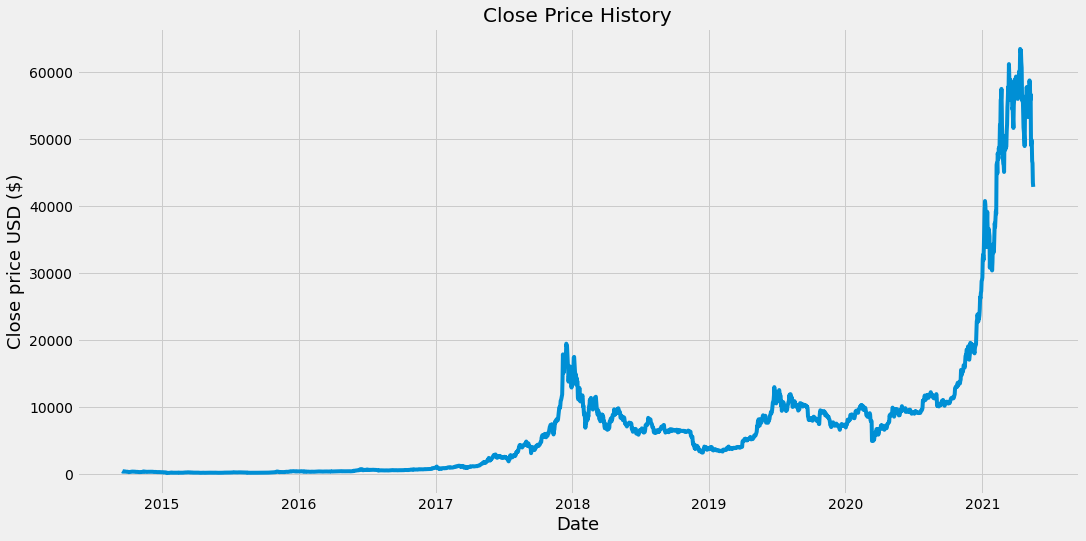

In [ ]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [ ]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1946

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.73079663],
       [0.68470851],
       [0.67478974]])

In [ ]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

[array([0.00440947, 0.00389002, 0.0034219 , 0.00364469, 0.00348546,
       0.00353806, 0.00406927, 0.00387052, 0.00368685, 0.00357396,
       0.0034965 , 0.00314373, 0.00311667, 0.00329791, 0.00324534,
       0.00311043, 0.00286471, 0.00238077, 0.00224882, 0.00239992,
       0.00249638, 0.00276093, 0.00295179, 0.00289709, 0.00290872,
       0.00316534, 0.0033527 , 0.00351782, 0.00342154, 0.00322861,
       0.00324759, 0.00336893, 0.00333899, 0.00323318, 0.0032905 ,
       0.00323812, 0.00284742, 0.00284628, 0.00267141, 0.00278879,
       0.00276171, 0.0028348 , 0.00248697, 0.00264036, 0.00253008,
       0.00233155, 0.0023338 , 0.00236005, 0.00240645, 0.00254847,
       0.00270329, 0.00259473, 0.00264325, 0.00292396, 0.00298176,
       0.00299394, 0.00387614, 0.00383151, 0.00346962, 0.00312718]), array([0.00389002, 0.0034219 , 0.00364469, 0.00348546, 0.00353806,
       0.00406927, 0.00387052, 0.00368685, 0.00357396, 0.0034965 ,
       0.00314373, 0.00311667, 0.00329791, 0.00324534, 0.00

In [ ]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1886, 60, 1)

In [ ]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1886/1886 [==============================] - 54s 19ms/step - loss: 3.3737e-04


In [ ]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2269.014518831983

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


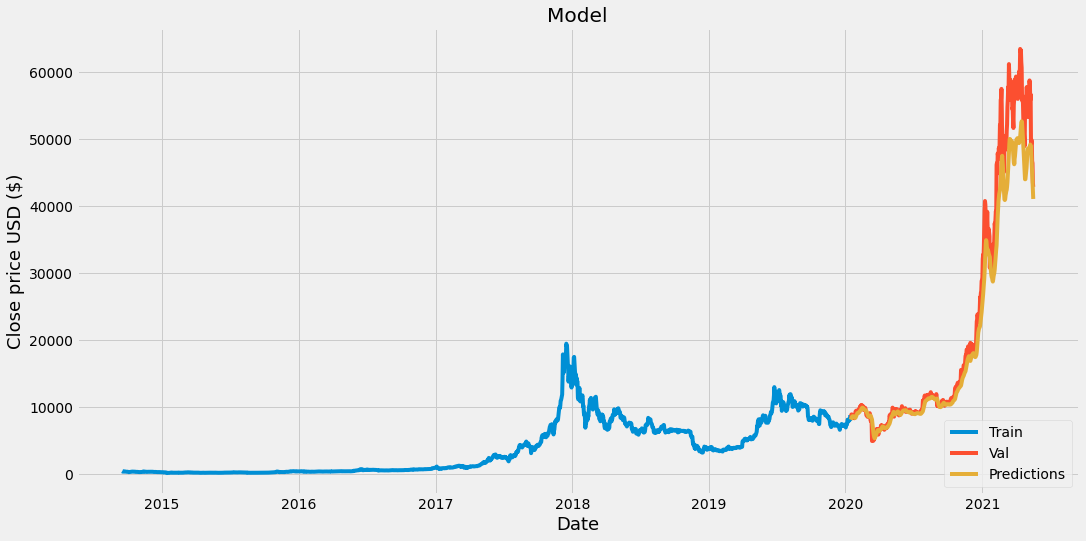

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-01-15,8807.010742,8149.287109
2020-01-16,8723.786133,8289.607422
2020-01-17,8929.038086,8405.623047
2020-01-18,8942.808594,8521.331055
2020-01-19,8706.245117,8620.958984
...,...,...
2021-05-13,49880.535156,46260.800781
2021-05-14,46760.187500,45073.343750
2021-05-15,46456.058594,43700.414062


In [ ]:
## predict stock price of Apple for 18/12/2019
# create a new df get teh last 60 days closing price values and convert the df to an array
last_60_days = data[-60:].values
# scale the data to be values betweeen 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
X_test = [] 
# append teh past 60 days
X_test.append(last_60_days_scaled)
# convert the X_test data set to a numpy array
X_test = np.array(X_test)
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[39846.54]]


In [ ]:
# get the quote 18/12/2019
val = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')
val['Close']

Date
2019-12-18    69.934998
Name: Close, dtype: float64